In [1]:
import pandas as pd
import acquire_p
import prepare_p
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Exercise

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

# Store

In [2]:
store = pd.read_csv('merged_zgulde.csv')

In [3]:
store.head()

,Unnamed: 0,sale_amount,sale_date,store,item_brand,item_name,item_price,store_address,store_city,store_state,store_zipcode
0,0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",1,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",1,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,3,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",1,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,4,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",1,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [4]:
col = store.columns

In [5]:
for c in col:
    print(c)
    print(store[c].nunique())

Unnamed: 0
913000
sale_amount
213
sale_date
1826
store
10
item_brand
49
item_name
50
item_price
47
store_address
10
store_city
1
store_state
1
store_zipcode
10


In [6]:
# gonna drop store city and store state cuz there is only 1 therefore it does not help predict target variable

In [7]:
store = store.drop(columns = ['Unnamed: 0', 'store_city', 'store_state'])

In [8]:
store.head()

,sale_amount,sale_date,store,item_brand,item_name,item_price,store_address,store_zipcode
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",1,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",1,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
3,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",1,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
4,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",1,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


In [9]:
store['sale_total']= store.sale_amount*store.item_price

In [10]:
store.sale_date = prepare_p.convert_time(store.sale_date)

In [11]:
store = prepare_p.convert_index(store, store.sale_date)

In [12]:
store = store.drop(columns = 'sale_date')

In [13]:
store.head()

,sale_amount,store,item_brand,item_name,item_price,store_address,store_zipcode,sale_total
sale_date,,,,,,,,
2013-01-01,13.0,1,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,10.92
2013-01-02,11.0,1,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,9.24
2013-01-03,14.0,1,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,11.76
2013-01-04,13.0,1,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,10.92
2013-01-05,10.0,1,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,8.40


# Split data
percent or human?

<AxesSubplot:xlabel='sale_date'>

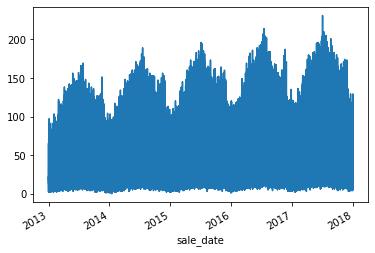

In [14]:
store.sale_amount.plot()

In [15]:
#cyclic and additive

<AxesSubplot:xlabel='sale_date'>

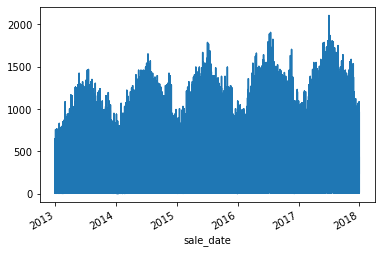

In [16]:
store.sale_total.plot()

In [17]:
# cyclic and addative

In [18]:
store.shape

(913000, 8)

# Human Split
-test is one cycle length
-train is the rest

In [19]:
train = store[:'2016']

<AxesSubplot:xlabel='sale_date'>

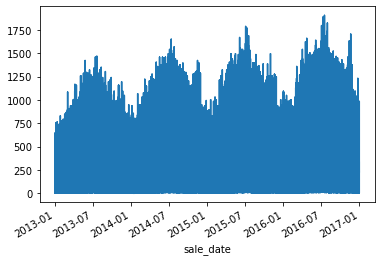

In [20]:
train.sale_total.plot()

In [21]:
train.shape

(730500, 8)

In [22]:
test = store['2017']

/var/folders/lh/dkl_j44s5s192k6tt8pqtrdh0000gn/T/ipykernel_20873/4003413845.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = store['2017']


<AxesSubplot:xlabel='sale_date'>

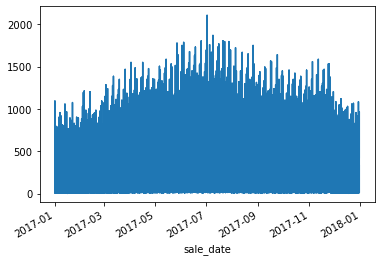

In [23]:
test.sale_total.plot()

In [24]:
test.shape

(182500, 8)

# #1
Don't consider time series, just get to know the data

In [25]:
train.head(3)

,sale_amount,store,item_brand,item_name,item_price,store_address,store_zipcode,sale_total
sale_date,,,,,,,,
2013-01-01,13.0,1,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,10.92
2013-01-02,11.0,1,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,9.24
2013-01-03,14.0,1,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,11.76


(array([ 87660.,  43830.,  87660.,  73050.,  43830., 102270.,  43830.,
         87660.,  87660.,  73050.]),
 array([0.6  , 1.504, 2.408, 3.312, 4.216, 5.12 , 6.024, 6.928, 7.832,
        8.736, 9.64 ]),
 <BarContainer object of 10 artists>)

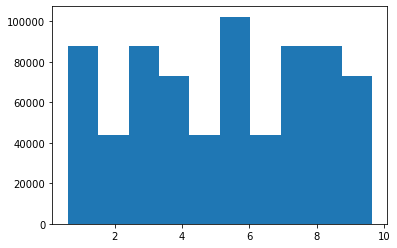

In [26]:
plt.hist(train.item_price)

(array([9.82500e+04, 2.36455e+05, 1.93271e+05, 1.14053e+05, 5.68700e+04,
        2.34490e+04, 6.56200e+03, 1.40700e+03, 1.70000e+02, 1.30000e+01]),
 array([  0. ,  21.4,  42.8,  64.2,  85.6, 107. , 128.4, 149.8, 171.2,
        192.6, 214. ]),
 <BarContainer object of 10 artists>)

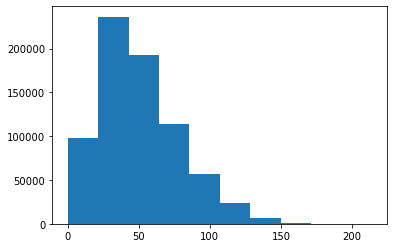

In [27]:
plt.hist(train.sale_amount)

(array([3.17468e+05, 2.22411e+05, 1.16610e+05, 4.78540e+04, 1.82630e+04,
        5.88600e+03, 1.58800e+03, 3.61000e+02, 5.00000e+01, 9.00000e+00]),
 array([   0.   ,  190.399,  380.798,  571.197,  761.596,  951.995,
        1142.394, 1332.793, 1523.192, 1713.591, 1903.99 ]),
 <BarContainer object of 10 artists>)

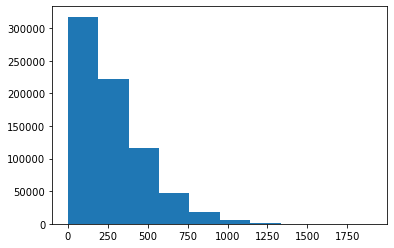

In [28]:
plt.hist(train.sale_total)

### catagorical variables:

In [29]:
cat_col = train[['item_brand', 'store', 'item_name', 'store_address', 'store_zipcode']]

In [30]:
for c in cat_col:
    print(train.value_counts(c))

item_brand
Usda Produce              29220
Ahold                     14610
Reese                     14610
Moms Best Naturals        14610
Morton                    14610
Mueller                   14610
Munchies                  14610
Nakano                    14610
Natures Way               14610
P.f. Changs               14610
Pamprin                   14610
Petmate                   14610
Riceland                  14610
Lea & Perrins             14610
Sally Hansen              14610
Scotch                    14610
Smart Living              14610
Suave                     14610
Sundown Naturals          14610
The First Years           14610
Triaminic                 14610
Twinings Of London        14610
Van De Kamps              14610
Mama Marys                14610
Kelloggs                  14610
Amys                      14610
Hood                      14610
Back To Nature            14610
Barefoot                  14610
Bear Naked                14610
Betty Crocker             146

# look at different groupings in the timeseries

group by item description

In [31]:
y =  train.sale_total

In [32]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

<AxesSubplot:xlabel='sale_date'>

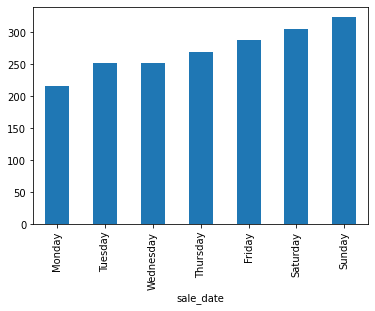

In [33]:
y.groupby(y.index.day_name()).mean().reindex(cats).plot.bar()

In [34]:
# People spend more on the weekend

<AxesSubplot:xlabel='sale_date'>

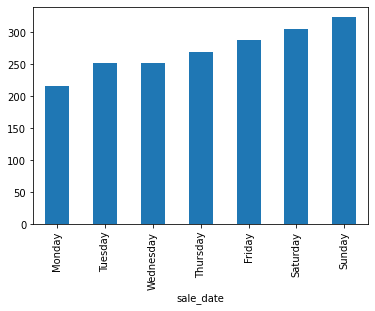

In [35]:
y.groupby(y.index.day_name()).mean().reindex(cats).plot.bar()

In [36]:
y.groupby(y.index.day_name()).mean().reindex(cats)

sale_date
Monday       215.819360
Tuesday      251.271150
Wednesday    251.701460
Thursday     269.017650
Friday       287.384088
Saturday     305.373388
Sunday       324.060338
Name: sale_total, dtype: float64

In [37]:
y.groupby(y.index.day_name()).mean().reindex(cats)[0]

215.81935980769234

In [38]:
y.groupby(y.index.day_name()).mean().reindex(cats)[1]

251.27115023923443

In [39]:
weekly = pd.DataFrame(y.groupby(y.index.day_name()).mean().reindex(cats))

In [40]:
weekly

,sale_total
sale_date,
Monday,215.819360
Tuesday,251.271150
Wednesday,251.701460
Thursday,269.017650
Friday,287.384088
Saturday,305.373388
Sunday,324.060338


<AxesSubplot:xlabel='sale_date', ylabel='sale_total'>

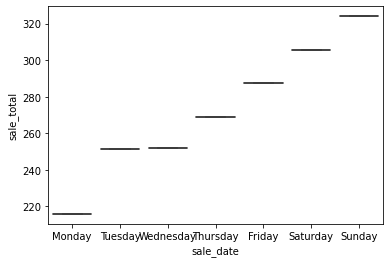

In [41]:
sns.boxplot(x = weekly.index, y = weekly.sale_total)

In [42]:
# you only fed one number into it. there is no average, quartiles etc in a single number

<AxesSubplot:xlabel='sale_date'>

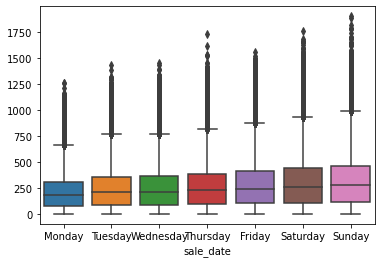

In [43]:
sns.boxplot(data = y, x = y.index.day_name(), y = y.values, order = cats)

<AxesSubplot:xlabel='sale_date'>

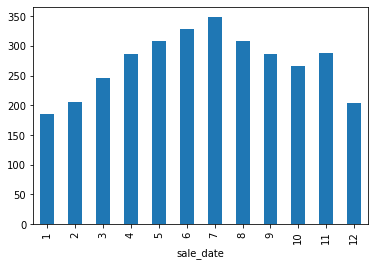

In [44]:
y.groupby(y.index.month).mean().plot.bar()

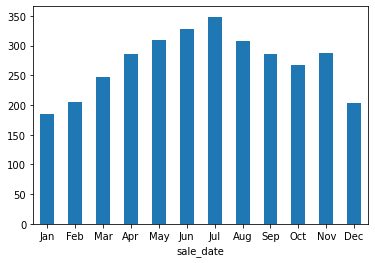

In [45]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0)
None

In [46]:
# People spend more in the summer and in the month  before christmas

# Visualize target over different timeframes

<AxesSubplot:xlabel='sale_date'>

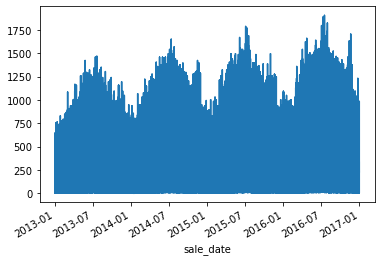

In [47]:
y.plot()

<AxesSubplot:title={'center':'5 day average'}, xlabel='sale_date'>

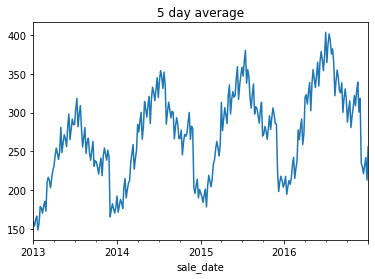

In [48]:
y.resample('5D').mean().plot(title='5 day average')

<AxesSubplot:title={'center':'weekly average'}, xlabel='sale_date'>

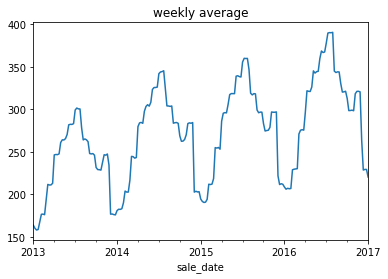

In [49]:
y.resample('W').mean().plot(title='weekly average')

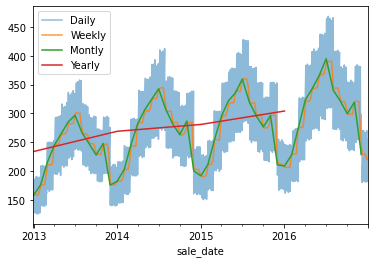

In [50]:
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

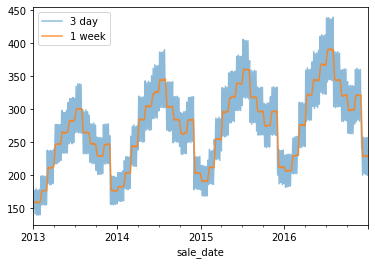

In [51]:
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=.8, label='1 week')
plt.legend()

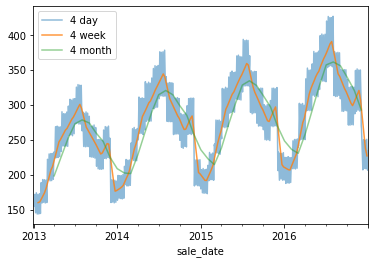

In [52]:
y.resample('D').mean().rolling(4).mean().plot(alpha=.5, label='4 day')
y.resample('W').mean().rolling(4).mean().plot(alpha=.8, label='4 week')
y.resample('M').mean().rolling(4).mean().plot(alpha=.5, label='4 month')
plt.legend()

# Visualize change over time

<AxesSubplot:title={'center':'Average week-to-week change in sale amount'}, xlabel='sale_date'>

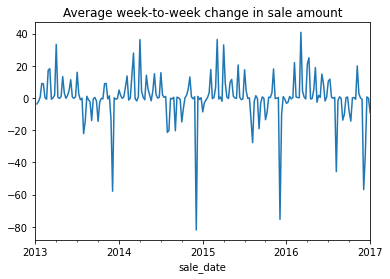

In [53]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in sale amount')

<AxesSubplot:title={'center':'Average mont-to-month change in sale amount'}, xlabel='sale_date'>

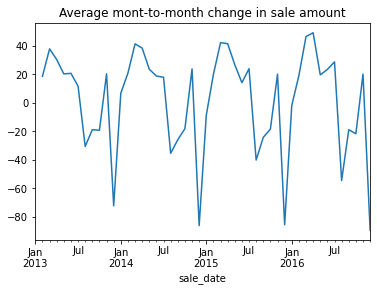

In [54]:
y.resample('M').mean().diff().plot(title='Average mont-to-month change in sale amount')

In [55]:
# Spike in Nov, Plung in Dec. Makes sense for cultures using Pagen related holidays

In [56]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0)

sale_date,2013,2014,2015,2016
sale_date,,,,
1,157.894723,182.410791,191.725206,208.900519
2,176.411855,203.207122,211.589839,227.977512
3,214.181650,244.488991,253.739390,274.367406
4,244.460082,282.786091,295.147608,323.461873
5,264.663123,306.267538,321.813672,342.986382
6,285.261279,324.965376,335.850784,366.316222
7,296.881241,342.849100,359.698008,394.953287
8,266.183375,307.345466,319.435676,340.315372
9,247.237694,281.350430,295.088416,321.333920


In [58]:
# seasonal plot

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

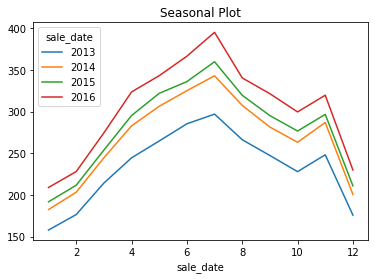

In [59]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

In [60]:
#seasonal subseries plot

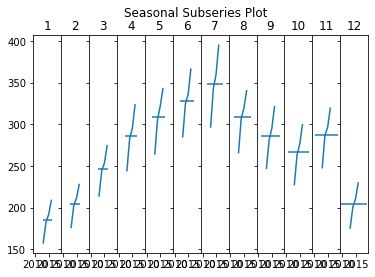

In [61]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

In [62]:
# lag plot

Text(0.5, 1.0, 'Lag plot with lag=1')

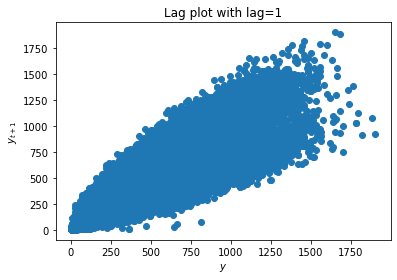

In [63]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

In [64]:
# autocorrelation plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

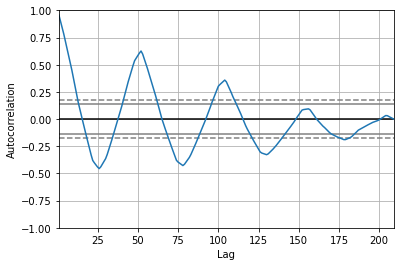

In [65]:
pd.plotting.autocorrelation_plot(y.resample('W').mean())

In [66]:
l = y

In [67]:
l

sale_date
2013-01-01     10.92
2013-01-02      9.24
2013-01-03     11.76
2013-01-04     10.92
2013-01-05      8.40
               ...  
2016-12-27    312.00
2016-12-28    223.60
2016-12-29    353.60
2016-12-30    327.60
2016-12-31    332.80
Name: sale_total, Length: 730500, dtype: float64

In [68]:
#Decomp plot!!!!

In [69]:

l = y.resample('W').mean()

result = sm.tsa.seasonal_decompose(l)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()


,y,trend,seasonal,resid
sale_date,,,,
2013-01-06,163.589167,NaN,-77.434789,NaN
2013-01-13,159.981203,NaN,-79.225757,NaN
2013-01-20,157.946720,NaN,-79.904284,NaN
2013-01-27,158.545383,NaN,-80.259357,NaN
2013-02-03,167.585014,NaN,-77.352692,NaN


<AxesSubplot:xlabel='sale_date'>

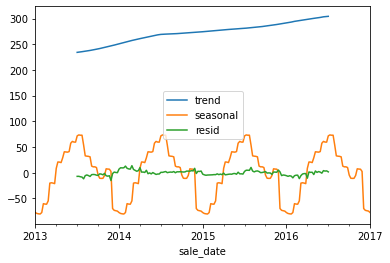

In [70]:
decomposition.iloc[:, 1:].plot()

In [71]:
train.head()

,sale_amount,store,item_brand,item_name,item_price,store_address,store_zipcode,sale_total
sale_date,,,,,,,,
2013-01-01,13.0,1,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,10.92
2013-01-02,11.0,1,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,9.24
2013-01-03,14.0,1,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,11.76
2013-01-04,13.0,1,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,10.92
2013-01-05,10.0,1,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,8.40


In [72]:
train = train.resample('D').mean()
# create a categorical feature
train['money_bin'] = pd.qcut(train.sale_total, 3, labels=['low', 'med', 'high'])
train.groupby('money_bin').mean()

,sale_amount,store,item_price,store_zipcode,sale_total
money_bin,,,,,
low,37.156653,5.5,5.1604,78224.8,199.789375
med,50.235359,5.5,5.1604,78224.8,270.068152
high,64.438674,5.5,5.1604,78224.8,346.420202


Text(0, 0.5, '% of days in the month')

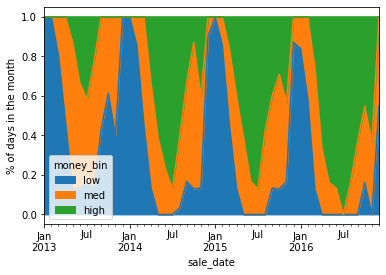

In [73]:
(train.groupby('money_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')

/var/folders/lh/dkl_j44s5s192k6tt8pqtrdh0000gn/T/ipykernel_20873/2277448486.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ax = (train['2016']


[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

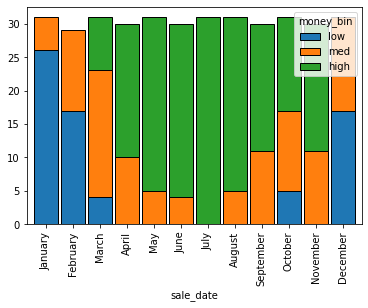

In [74]:
ax = (train['2016']
 .groupby('money_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)

In [75]:
# for more sylistic future

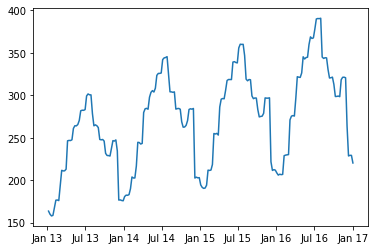

In [76]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = y.resample('W').mean()

ax.plot(weekly.index, weekly)

ax.xaxis.set_major_formatter(DateFormatter('%b %y'))

In [77]:
# (
#     y.reset_index()
#     .assign(weekday=lambda df: df.datetime.dt.day_name())
#     .pipe((sns.boxplot, 'data'), y='temp', x='weekday')
# )


# Ger opsd

In [209]:
ger = pd.read_csv('ger_elec.csv')

In [210]:
ger.head()

,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar
0,0,2006-01-01,1069.184,NaN,NaN,NaN
1,1,2006-01-02,1380.521,NaN,NaN,NaN
2,2,2006-01-03,1442.533,NaN,NaN,NaN
3,3,2006-01-04,1457.217,NaN,NaN,NaN
4,4,2006-01-05,1477.131,NaN,NaN,NaN


In [211]:
ger = prepare_p.fillna(ger, 0)

In [212]:
ger.drop(columns = 'Unnamed: 0', inplace = True)

In [213]:
ger.Date = prepare_p.convert_time(ger.Date)

In [214]:
ger

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,0.000,0.000,0.000
1,2006-01-02,1380.52100,0.000,0.000,0.000
2,2006-01-03,1442.53300,0.000,0.000,0.000
3,2006-01-04,1457.21700,0.000,0.000,0.000
4,2006-01-05,1477.13100,0.000,0.000,0.000
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [215]:
ger = prepare_p.convert_index(ger, ger.Date)

In [216]:
ger.drop(columns = 'Date', inplace = True)

In [217]:
ger.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         4383 non-null   float64
 2   Solar        4383 non-null   float64
 3   Wind+Solar   4383 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


In [218]:
ger.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,0.0,0.0,0.0
2006-01-02,1380.521,0.0,0.0,0.0
2006-01-03,1442.533,0.0,0.0,0.0
2006-01-04,1457.217,0.0,0.0,0.0
2006-01-05,1477.131,0.0,0.0,0.0


In [219]:
ger.columns

Index(['Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

In [220]:
ger.rename(columns={'Consumption':'consumption', 'Wind':'wind', 'Solar':'solar', 'Wind+Solar':'both'}, inplace=True)

# Split Data
percent or human?

<AxesSubplot:xlabel='Date'>

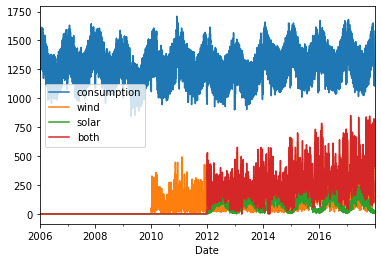

In [221]:
ger.plot()

In [222]:
#lots of overlap, gonna look at individual

<AxesSubplot:xlabel='Date'>

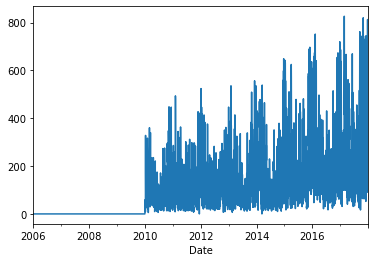

In [223]:
ger.wind.plot()

<AxesSubplot:xlabel='Date'>

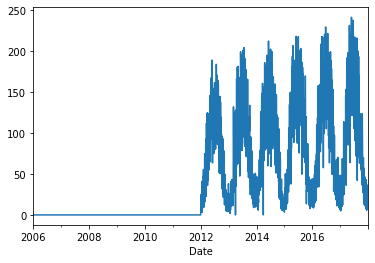

In [224]:
ger.solar.plot()

<AxesSubplot:xlabel='Date'>

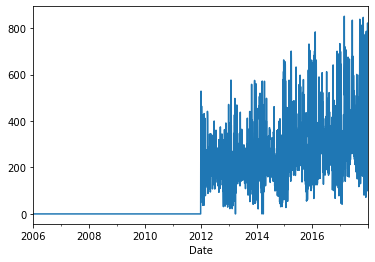

In [225]:
ger.both.plot()

In [226]:
train = ger[:'2015']

<AxesSubplot:xlabel='Date'>

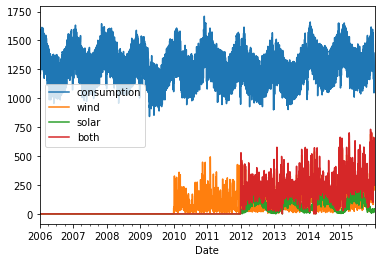

In [227]:
train.plot()

In [228]:
ger.describe()

,consumption,wind,solar,both
count,4383.000000,4383.000000,4383.000000,4383.000000
mean,1338.675836,109.800909,44.558071,136.051799
std,165.775710,140.698109,60.853561,171.087206
min,842.395000,0.000000,0.000000,0.000000
25%,1217.859000,0.000000,0.000000,0.000000
50%,1367.123000,62.293000,0.000000,0.000000
75%,1457.761000,162.366000,86.268000,240.698500
max,1709.568000,826.278000,241.580000,851.556000


In [229]:
ger.index.min(), ger.index.max(), train.index.min(), train.index.max()

(Timestamp('2006-01-01 00:00:00'),
 Timestamp('2017-12-31 00:00:00'),
 Timestamp('2006-01-01 00:00:00'),
 Timestamp('2015-12-31 00:00:00'))

In [230]:
ger['year'] = ger.index.year

In [231]:
ger.year.value_counts()

2008    366
2012    366
2016    366
2006    365
2007    365
2009    365
2010    365
2011    365
2013    365
2014    365
2015    365
2017    365
Name: year, dtype: int64

In [232]:
test = ger['2017']

/var/folders/lh/dkl_j44s5s192k6tt8pqtrdh0000gn/T/ipykernel_20873/2194278281.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = ger['2017']


In [233]:
train.head(3)

,consumption,wind,solar,both
Date,,,,
2006-01-01,1069.184,0.0,0.0,0.0
2006-01-02,1380.521,0.0,0.0,0.0
2006-01-03,1442.533,0.0,0.0,0.0


(array([ 15., 123., 309., 379., 387., 661., 852., 585., 310.,  31.]),
 array([ 842.395 ,  929.1123, 1015.8296, 1102.5469, 1189.2642, 1275.9815,
        1362.6988, 1449.4161, 1536.1334, 1622.8507, 1709.568 ]),
 <BarContainer object of 10 artists>)

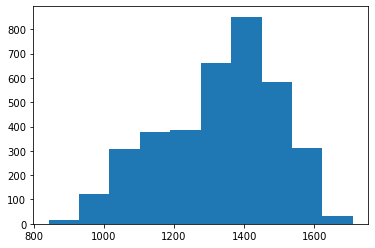

In [234]:
plt.hist(train.consumption)

(array([2222.,  624.,  367.,  174.,  112.,   66.,   40.,   23.,   15.,
           9.]),
 array([  0.    ,  69.6637, 139.3274, 208.9911, 278.6548, 348.3185,
        417.9822, 487.6459, 557.3096, 626.9733, 696.637 ]),
 <BarContainer object of 10 artists>)

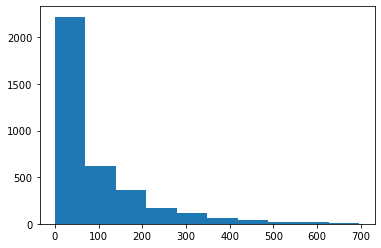

In [235]:
plt.hist(train.wind)

(array([2440.,  224.,  141.,  146.,  154.,  183.,  163.,   96.,   82.,
          23.]),
 array([  0.    ,  21.8299,  43.6598,  65.4897,  87.3196, 109.1495,
        130.9794, 152.8093, 174.6392, 196.4691, 218.299 ]),
 <BarContainer object of 10 artists>)

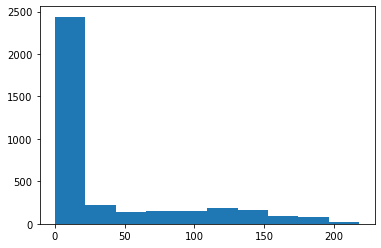

In [236]:
plt.hist(train.solar)

(array([2271.,  225.,  437.,  365.,  163.,   77.,   58.,   31.,   17.,
           8.]),
 array([  0.    ,  73.1845, 146.369 , 219.5535, 292.738 , 365.9225,
        439.107 , 512.2915, 585.476 , 658.6605, 731.845 ]),
 <BarContainer object of 10 artists>)

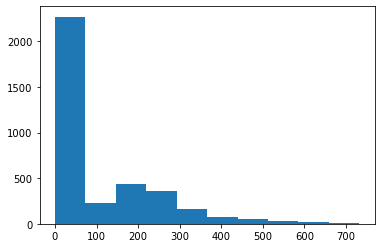

In [237]:
plt.hist(train.both)

# look at different groupings in the timeseries

group by item description

In [238]:
y =  train

In [239]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

<AxesSubplot:xlabel='Date'>

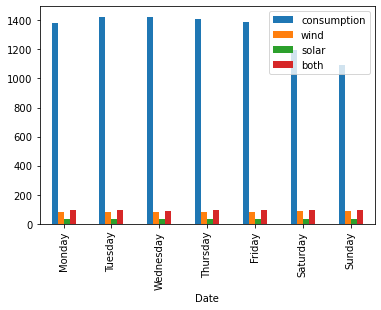

In [240]:
y.groupby(y.index.day_name()).mean().reindex(cats).plot.bar()

In [241]:
# People spend more on the weekend

<AxesSubplot:xlabel='Date', ylabel='consumption'>

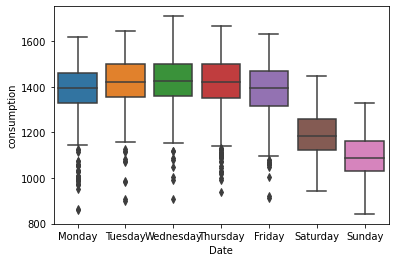

In [242]:
sns.boxplot(data = y, x = y.index.day_name(), y = y.consumption, order = cats)

<AxesSubplot:xlabel='Date', ylabel='solar'>

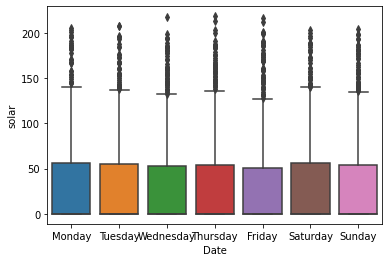

In [243]:
sns.boxplot(data = y, x = y.index.day_name(), y = y.solar, order = cats)

<AxesSubplot:xlabel='Date', ylabel='wind'>

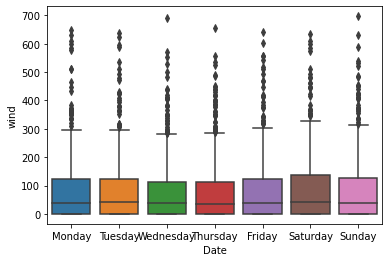

In [244]:
sns.boxplot(data = y, x = y.index.day_name(), y = y.wind, order = cats)

<AxesSubplot:xlabel='Date', ylabel='both'>

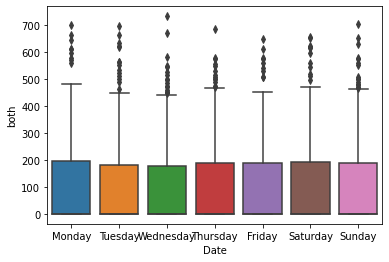

In [245]:
sns.boxplot(data = y, x = y.index.day_name(), y = y.both, order = cats)

<AxesSubplot:xlabel='Date'>

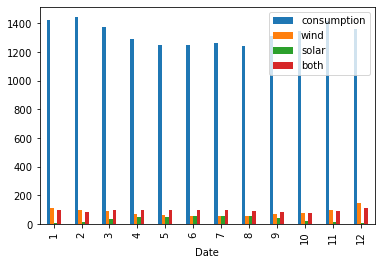

In [246]:
y.groupby(y.index.month).mean().plot.bar()

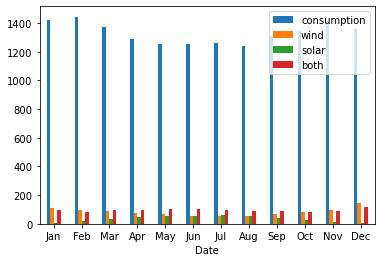

In [247]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0)
None

In [248]:
#More consumption in the winter months

# Visualize target over different timeframes

<AxesSubplot:xlabel='Date'>

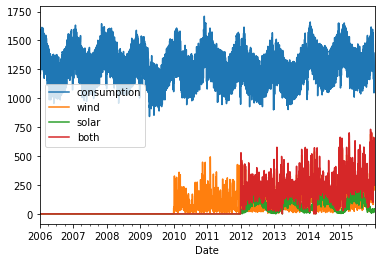

In [249]:
y.plot()

<AxesSubplot:title={'center':'5 day average'}, xlabel='Date'>

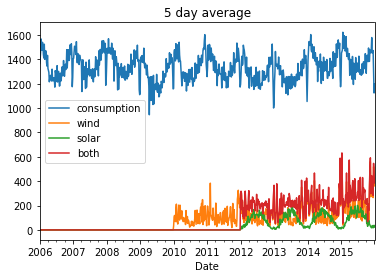

In [250]:
y.resample('5D').mean().plot(title='5 day average')

<AxesSubplot:title={'center':'weekly average'}, xlabel='Date'>

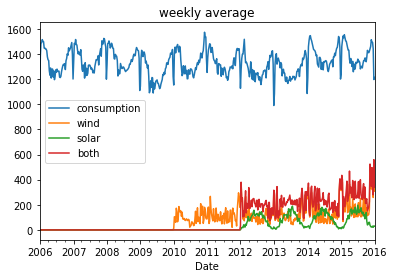

In [251]:
y.resample('W').mean().plot(title='weekly average')

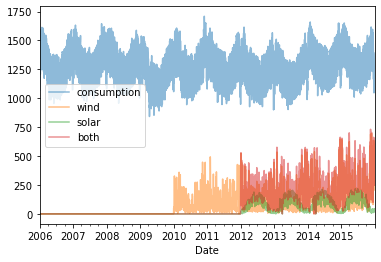

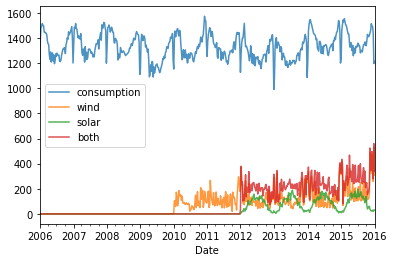

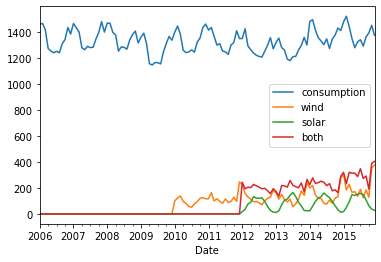

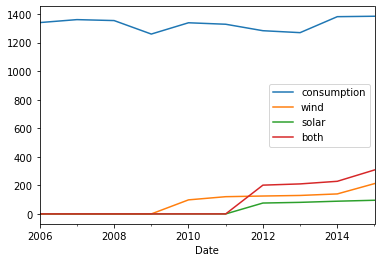

In [252]:
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

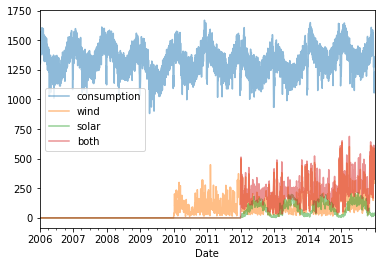

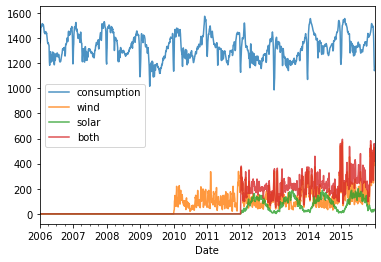

In [253]:
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=.8, label='1 week')
plt.legend()

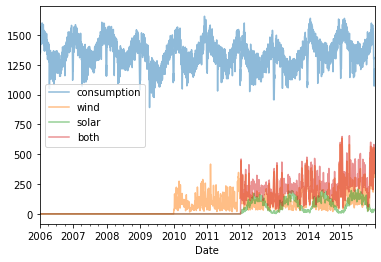

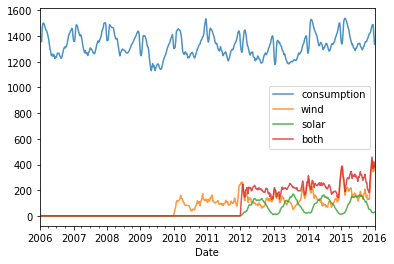

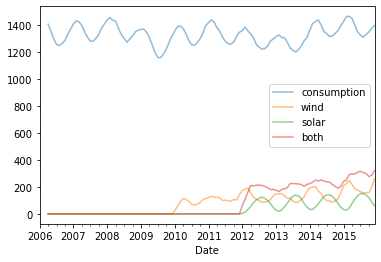

In [254]:
y.resample('D').mean().rolling(4).mean().plot(alpha=.5, label='4 day')
y.resample('W').mean().rolling(4).mean().plot(alpha=.8, label='4 week')
y.resample('M').mean().rolling(4).mean().plot(alpha=.5, label='4 month')
plt.legend()

# Visualize change over time

<AxesSubplot:title={'center':'Average week-to-week change in sale amount'}, xlabel='Date'>

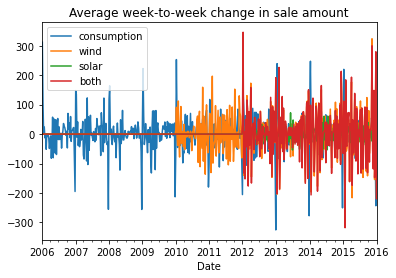

In [255]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in sale amount')

<AxesSubplot:title={'center':'Average mont-to-month change in sale amount'}, xlabel='Date'>

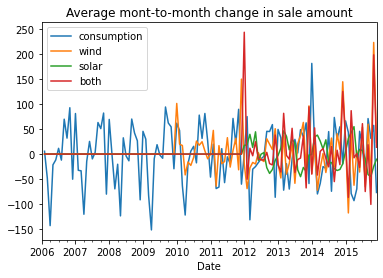

In [256]:
y.resample('M').mean().diff().plot(title='Average mont-to-month change in sale amount')

In [257]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0)

consumption                                                      \
Date         2006         2007         2008         2009         2010   
Date                                                                    
1     1461.442065  1467.058032  1470.373484  1362.255613  1400.041677   
2     1467.106893  1434.484357  1468.486207  1392.155179  1447.322536   
3     1418.649161  1400.909871  1398.653258  1309.222387  1383.865226   
4     1275.058900  1280.133167  1378.243233  1157.006367  1261.505467   
5     1253.488484  1265.436000  1254.194226  1147.650742  1242.220129   
6     1241.781667  1290.828733  1286.797100  1166.456833  1247.938433   
7     1253.296290  1281.134258  1282.866355  1164.515871  1263.467452   
8     1241.188774  1284.554355  1269.323484  1156.114645  1245.832323   
9     1311.169933  1347.857500  1339.615433  1250.585967  1324.003533   
10    1343.161903  1398.924581  1381.788323  1312.905000  1355.390839   
11    1436.164133  1481.237600  1408.506233  1367.505100  1436.854833   
12    1385.686355  1400.840161  1316.669129  1337.995581  1462.556581   

                                                                       ...  \
Date         2011         2012         2013         2014         2015  ...   
Date                                                                   ...   
1     1416.290581  1351.441226  1321.194935  1483.261323  1479.451968  ...   
2     1436.212607  1426.666241  1354.087429  1496.465536  1522.838964  ...   
3     1366.989516  1294.748258  1281.671581  1416.458355  1443.586774  ...   
4     1300.732300  1264.427000  1262.359967  1357.582700  1350.108400  ...   
5     1311.608290  1239.388710  1192.123032  1332.490710  1280.312677  ...   
6     1254.294333  1222.315667  1181.999000  1303.712233  1325.948067  ...   
7     1248.768194  1212.953710  1211.503484  1348.810258  1341.598968  ...   
8     1229.204935  1208.466258  1213.691355  1274.170968  1292.465581  ...   
9     1300.706833  1254.097633  1262.723900  1347.642400  1363.728767  ...   
10    1321.337484  1299.330355  1297.771387  1377.754355  1395.132194  ...   
11    1411.144733  1358.505700  1360.433367  1432.526667  1452.687033  ...   
12    1350.761871  1271.769968  1301.299645  1412.856161  1375.545516  ...   

     both                                                               \
Date 2006 2007 2008 2009 2010 2011        2012        2013        2014   
Date                                                                     
1     0.0  0.0  0.0  0.0  0.0  0.0  244.468871  173.074226  224.963194   
2     0.0  0.0  0.0  0.0  0.0  0.0  193.900069  137.142357  277.538500   
3     0.0  0.0  0.0  0.0  0.0  0.0  205.658742  218.913194  235.445226   
4     0.0  0.0  0.0  0.0  0.0  0.0  202.274233  216.233033  240.807467   
5     0.0  0.0  0.0  0.0  0.0  0.0  227.016774  205.934839  251.953323   
6     0.0  0.0  0.0  0.0  0.0  0.0  217.154433  257.637833  243.569333   
7     0.0  0.0  0.0  0.0  0.0  0.0  205.829129  220.628903  217.897387   
8     0.0  0.0  0.0  0.0  0.0  0.0  193.862032  209.712871  233.157806   
9     0.0  0.0  0.0  0.0  0.0  0.0  197.312833  201.618667  177.872267   
10    0.0  0.0  0.0  0.0  0.0  0.0  178.141387  238.280258  185.557613   
11    0.0  0.0  0.0  0.0  0.0  0.0  156.348367  170.354733  164.253000   
12    0.0  0.0  0.0  0.0  0.0  0.0  194.513419  265.137290  289.875839   

                  
Date        2015  
Date              
1     320.536774  
2     233.635500  
3     320.697097  
4     313.146200  
5     314.165806  
6     287.561833  
7     348.566097  
8     273.400645  
9     292.114233  
10    191.096774  
11    390.210933  
12    403.902677  

[12 rows x 40 columns]

In [258]:
# seasonal plot

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='Date'>

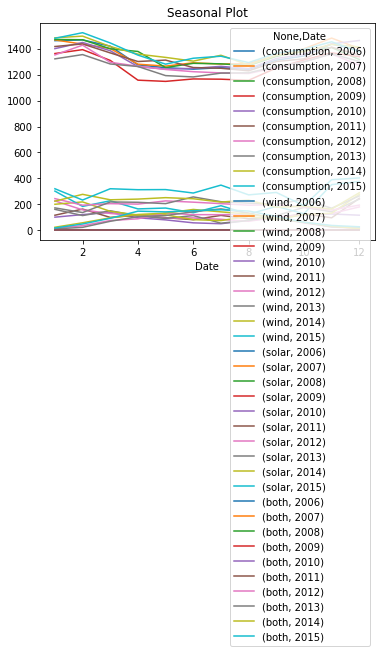

In [259]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

In [260]:
#seasonal subseries plot

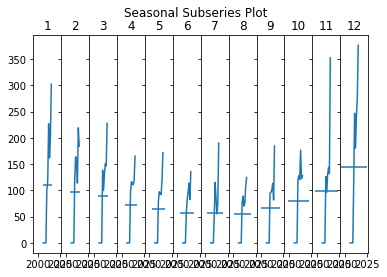

In [261]:
table = y.wind.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

In [262]:
# lag plot

Text(0.5, 1.0, 'Lag plot with lag=1')

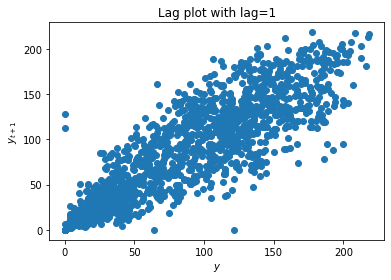

In [263]:
plt.scatter(y.solar, y.solar.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

In [264]:
# autocorrelation plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

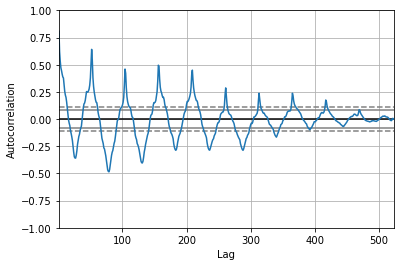

In [265]:
pd.plotting.autocorrelation_plot(y.consumption.resample('W').mean())